In [1]:
from spectral import *

import spectral.io.envi as envi

import numpy as np

import matplotlib.pyplot as plt

def norma(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angulo(v1, v2):
    v1_u = norma(v1)
    v2_u = norma(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

img = envi.open('./img/004.hdr', "./img/004.float")

data_trn = img[50:160, 290:400,:]

# inicializo estructuras

d_renglones, d_colunmas, d_bandas = np.shape(data_trn)

idx_largo = 0

idx_ancho = 0

data_cmp = []

data_trest = []

data_clasifica = []

data_pixel_clasifica = []

#aplano la matriz de espectros y le agrgo su posicion en el arreglo original
# l_2 = l_2.astype(np.float32)

for largo in data_trn:
    for ancho in largo:
        arr_coord = np.float32([idx_largo, idx_ancho])
        arr_banda_plus = np.concatenate((ancho, arr_coord)) 
        data_trest.append([arr_banda_plus])
        idx_ancho = idx_ancho + 1
    idx_largo = idx_largo + 1
    idx_ancho = 0

# voy a hacer una lista de clases que esten muy cercanas, empiezo con 0.2

data_clases = []

data_pixel_clases = []

In [2]:
while (len(data_trest)):
    pixel = data_trest[0]
    
    data_trest = data_trest[1:]
    
    pixel = np.reshape(pixel, (d_bandas+2,))
    
    data_clasifica.append([pixel])
    
    for largo in data_trest:
        for ancho in largo:
            if (angulo(ancho, pixel) < 0.3):
                data_clasifica.append([ancho])
            else:
                data_cmp.append([ancho])
    print(len(data_trest))
    data_trest = data_cmp
    data_clases.append(data_clasifica)
    data_cmp = []
    data_clasifica = []

12099
12096
12092
12084
12030
10287
10284
10281
10271
10249
10241
10229
8930
8887
8789
7467
7358
3537
750


In [3]:
for i in data_clases:
    print(len(i))

3
4
8
54
1743
3
3
10
22
8
12
1299
43
98
1322
109
3821
2787
751


In [4]:
color = [255, 200, 0]

In [7]:
img_trans = np.zeros((d_renglones, d_colunmas,3))
for i in data_clases[16]:
    x, y = np.int_(i[0][128:])
    img_trans[x][y] = color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


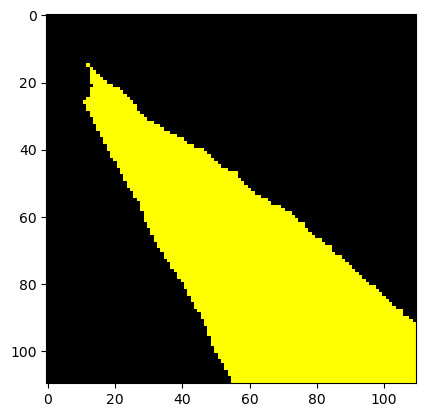

In [8]:
plt.imshow(img_trans)